<a href="https://colab.research.google.com/github/henrique-furtado47/Algoritmos-python/blob/main/POO_II_Atividade_Pratica_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

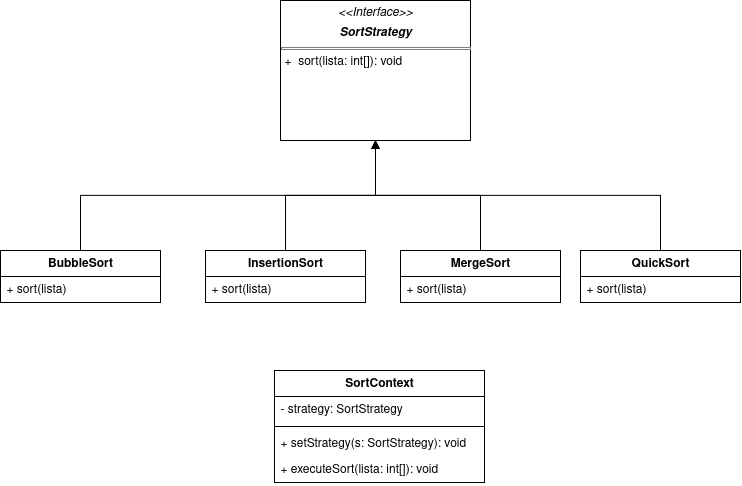

2

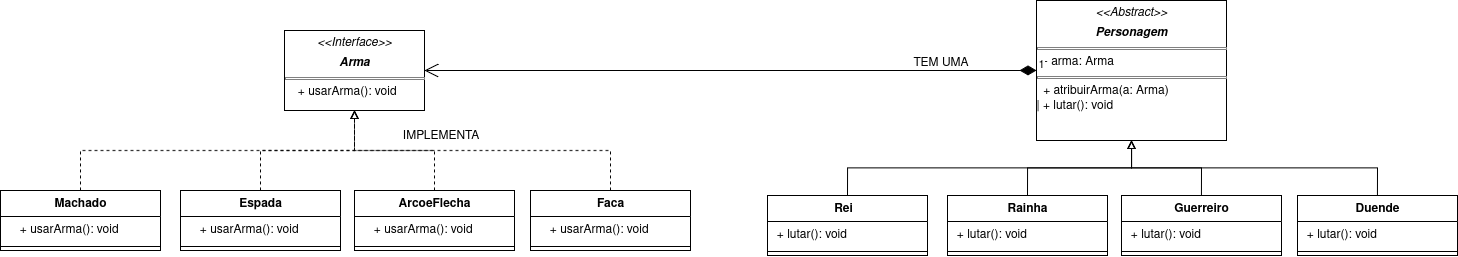

3

Questão 1

In [47]:
# main.py
from abc import ABC, abstractmethod
from typing import List

# 1. Interface da Estratégia (Strategy Interface)
class SortStrategy(ABC):
    """
    A Interface da Estratégia declara operações comuns a todos os algoritmos
    de ordenação suportados. O Contexto usa esta interface para chamar o
    algoritmo definido por uma Estratégia Concreta.
    """
    @abstractmethod
    def sort(self, data: List[int]) -> None:
        pass

In [48]:
# 2. Estratégias Concretas (Concrete Strategies)

class BubbleSort(SortStrategy):
    """Ordena a lista usando o algoritmo Bubble Sort."""
    def sort(self, data: List[int]) -> None:
        print("Executando ordenação com BubbleSort...")
        n = len(data)
        for i in range(n):
            swapped = False
            for j in range(0, n - i - 1):
                if data[j] > data[j + 1]:
                    data[j], data[j + 1] = data[j + 1], data[j]
                    swapped = True
            if not swapped:
                break

class InsertionSort(SortStrategy):
    """Ordena a lista usando o algoritmo Insertion Sort."""
    def sort(self, data: List[int]) -> None:
        print("Executando ordenação com InsertionSort...")
        for i in range(1, len(data)):
            key = data[i]
            j = i - 1
            while j >= 0 and key < data[j]:
                data[j + 1] = data[j]
                j -= 1
            data[j + 1] = key


class MergeSort(SortStrategy):
    """Ordena a lista usando o algoritmo Merge Sort."""
    def sort(self, data: List[int]) -> None:
        print("Executando ordenação com MergeSort...")
        if len(data) > 1:
            mid = len(data) // 2
            L = data[:mid]
            R = data[mid:]

            self.sort(L)
            self.sort(R)

            i = j = k = 0

            while i < len(L) and j < len(R):
                if L[i] < R[j]:
                    data[k] = L[i]
                    i += 1
                else:
                    data[k] = R[j]
                    j += 1
                k += 1

            while i < len(L):
                data[k] = L[i]
                i += 1
                k += 1

            while j < len(R):
                data[k] = R[j]
                j += 1
                k += 1
class QuickSort(SortStrategy):
    """Ordena a lista usando o algoritmo Quick Sort."""
    def sort(self, data: List[int]) -> None:
        print("Executando ordenação com QuickSort...")
        self._quick_sort_recursive(data, 0, len(data) - 1)

    def _partition(self, data: List[int], low: int, high: int) -> int:
        pivot = data[high]
        i = low - 1
        for j in range(low, high):
            if data[j] <= pivot:
                i += 1
                data[i], data[j] = data[j], data[i]
        data[i + 1], data[high] = data[high], data[i + 1]
        return i + 1

    def _quick_sort_recursive(self, data: List[int], low: int, high: int) -> None:
        if low < high:
            pi = self._partition(data, low, high)
            self._quick_sort_recursive(data, low, pi - 1)
            self._quick_sort_recursive(data, pi + 1, high)

In [49]:
# 3. Contexto (Context)
# O Contexto define a interface de interesse para os clientes.

class SortContext:

    def __init__(self, strategy: SortStrategy = None):
        self._strategy = strategy

    def set_strategy(self, strategy: SortStrategy) -> None:

        print(f"\nContexto: Trocando a estratégia para {strategy.__class__.__name__}")
        self._strategy = strategy

    def execute_sort(self, data: List[int]) -> None:
        if not self._strategy:
            print("Contexto: Nenhuma estratégia foi definida. Por favor, defina uma.")
            return

        # Copia a lista para não alterar a original entre execuções
        list_to_sort = data.copy()
        print("Lista antes da ordenação:", list_to_sort)

        self._strategy.sort(list_to_sort)

        print("Lista depois da ordenação:", list_to_sort)

In [50]:
# 4. Código Cliente (Client Code)
if __name__ == "__main__":
    # A lista de dados que queremos ordenar
    minha_lista = [34, 12, 5, 67, 23, 89, 1, 90, 43]

    # O cliente cria um objeto Contexto
    context = SortContext()

    # O cliente decide qual estratégia usar e a passa para o contexto
    context.set_strategy(BubbleSort())
    context.execute_sort(minha_lista)

    # O cliente pode trocar a estratégia em tempo de execução
    context.set_strategy(QuickSort())
    context.execute_sort(minha_lista)

    # E de novo...
    context.set_strategy(InsertionSort())
    context.execute_sort(minha_lista)


Contexto: Trocando a estratégia para BubbleSort
Lista antes da ordenação: [34, 12, 5, 67, 23, 89, 1, 90, 43]
Executando ordenação com BubbleSort...
Lista depois da ordenação: [1, 5, 12, 23, 34, 43, 67, 89, 90]

Contexto: Trocando a estratégia para QuickSort
Lista antes da ordenação: [34, 12, 5, 67, 23, 89, 1, 90, 43]
Executando ordenação com QuickSort...
Lista depois da ordenação: [1, 5, 12, 23, 34, 43, 67, 89, 90]

Contexto: Trocando a estratégia para InsertionSort
Lista antes da ordenação: [34, 12, 5, 67, 23, 89, 1, 90, 43]
Executando ordenação com InsertionSort...
Lista depois da ordenação: [1, 5, 12, 23, 34, 43, 67, 89, 90]


Questão 2


In [51]:
from abc import ABC, abstractmethod

class Arma(ABC):
    @abstractmethod
    def usar_arma(self):
        pass


In [52]:
class Machado(Arma):
    def usar_arma(self):
        print("Golpeando com o machado!")

class ArcoEFlexa(Arma):
    def usar_arma(self):
        print("Atirando flecha com arco!")

class Espada(Arma):
    def usar_arma(self):
        print("Atacando com espada!")

class Faca(Arma):
    def usar_arma(self):
        print("Golpeando com a faca!")


In [53]:
class Personagem(ABC):
    def __init__(self, arma: Arma):
        self.arma = arma

    def atribui_arma(self, arma: Arma):
        self.arma = arma

    @abstractmethod
    def lutar(self):
        pass


In [54]:
class Rei(Personagem):
    def lutar(self):
        print("O Rei entra em combate!")
        self.arma.usar_arma()

class Rainha(Personagem):
    def lutar(self):
        print("A Rainha se prepara para a batalha!")
        self.arma.usar_arma()

class Guerreiro(Personagem):
    def lutar(self):
        print("O Guerreiro ataca!")
        self.arma.usar_arma()

class Duende(Personagem):
    def lutar(self):
        print("O Duende avança sorrateiramente!")
        self.arma.usar_arma()


In [55]:
if __name__ == "__main__":
    # Criando personagens com diferentes armas
    rei = Rei(Espada())
    rainha = Rainha(ArcoEFlexa())
    guerreiro = Guerreiro(Machado())
    duende = Duende(Faca())

    # Lutando com armas iniciais
    rei.lutar()
    rainha.lutar()
    guerreiro.lutar()
    duende.lutar()

    print("\n-- Mudando as armas durante o jogo --\n")

    # Mudando estratégias de arma em tempo de execução
    rei.atribui_arma(Machado())
    rainha.atribui_arma(Faca())

    rei.lutar()
    rainha.lutar()


O Rei entra em combate!
Atacando com espada!
A Rainha se prepara para a batalha!
Atirando flecha com arco!
O Guerreiro ataca!
Golpeando com o machado!
O Duende avança sorrateiramente!
Golpeando com a faca!

-- Mudando as armas durante o jogo --

O Rei entra em combate!
Golpeando com o machado!
A Rainha se prepara para a batalha!
Golpeando com a faca!
